## Kyphosis Exploratory Data Analysis (EDA) Capstone Project
---

## Import Data

In [1]:
import pandas as pd

kyphosis = pd.read_csv('kyphosis.csv')

## Perform Basic Exploratory Data Analysis (EDA)

In [108]:
kyphosis.head() 

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [109]:
kyphosis.tail() 

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [110]:
#check for null/missing values
kyphosis.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [111]:
# average values for dataset
round(kyphosis.mean(numeric_only=True), 2)

Age       83.65
Number     4.05
Start     11.49
dtype: float64

In [112]:
kyphosis.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [113]:
# statistical summary
round(kyphosis.describe(), 2) 

,Age,Number,Start
count,81.00,81.00,81.00
mean,83.65,4.05,11.49
std,58.10,1.62,4.88
min,1.00,2.00,1.00
25%,26.00,3.00,9.00
50%,87.00,4.00,13.00
75%,130.00,5.00,16.00
max,206.00,10.00,18.00


## Average, Minimum and Maximum Age (in Years)

In [114]:
#average age 
(kyphosis['Age']/12).mean()

6.971193415637861

In [115]:
# min age
(kyphosis['Age']/12).min()

0.08333333333333333

In [116]:
# max age
(kyphosis['Age']/12).max()

17.166666666666668

## Plot Correlation Matrix 

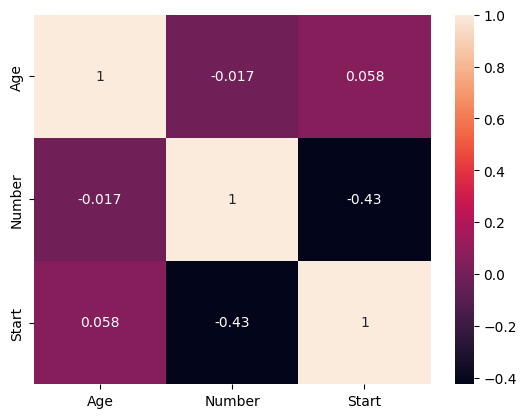

In [117]:
## import pkgs for visual
import matplotlib.pyplot as plt
import seaborn as sn


## create correlation matrix 
#filter df for only numerical cols
kyph_matrix = kyphosis.iloc[:,1:4].corr()  

# visualize matrix
sn.heatmap(kyph_matrix, annot=True)
plt.show()

## Convert Data Type of Age Column 

In [118]:
# convert age column from int to float
kyphosis['Age'] = kyphosis['Age'].astype(float)
kyphosis.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Kyphosis  81 non-null     object 
 1   Age       81 non-null     float64
 2   Number    81 non-null     int64  
 3   Start     81 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.7+ KB


## Define a Function that Converts Months to Years 

In [119]:
def month_to_years(m): 
    return m/12

## Apply Function to Create New Column 

In [120]:
kyphosis['Age in Years'] = round(kyphosis['Age'].apply(month_to_years), 2)

#view data w/new column
kyphosis.head()

,Kyphosis,Age,Number,Start,Age in Years
0,absent,71.0,3,5,5.92
1,absent,158.0,3,14,13.17
2,present,128.0,4,5,10.67
3,absent,2.0,5,1,0.17
4,absent,1.0,4,15,0.08


## Features of the Oldest and Youngest Children

### Oldest 

In [121]:
kyphosis[kyphosis["Age"] == kyphosis["Age"].max()]

,Kyphosis,Age,Number,Start,Age in Years
73,absent,206.0,4,10,17.17


### Youngest

In [122]:
kyphosis[kyphosis["Age"] == kyphosis["Age"].min()]

,Kyphosis,Age,Number,Start,Age in Years
4,absent,1.0,4,15,0.08
5,absent,1.0,2,16,0.08
13,absent,1.0,4,12,0.08
15,absent,1.0,3,16,0.08
36,absent,1.0,3,9,0.08


## Scale Raw Age (in months) Column using Two Methods

### Perform Standardization

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
kyphosis['Age'] = scaler.fit_transform(kyphosis['Age'].values.reshape(-1,1))

In [131]:
#sanity check 
round(kyphosis['Age'].describe(),2) 

count    81.00
mean      0.00
std       1.01
min      -1.43
25%      -1.00
50%       0.06
75%       0.80
max       2.12
Name: Age, dtype: float64

### Perform Normalization

In [133]:
from sklearn.preprocessing import MinMaxScaler

kyphosis['Age'].values
scaler = MinMaxScaler()
kyphosis['Age'] = scaler.fit_transform(kyphosis['Age'].values.reshape(-1,1))

In [134]:
#sanity check
round(kyphosis['Age'].describe(),2) 

count    81.00
mean      0.40
std       0.28
min       0.00
25%       0.12
50%       0.42
75%       0.63
max       1.00
Name: Age, dtype: float64